# K-NN:

<span class="mark">The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. “Birds of a feather flock together.”</span>
 
 
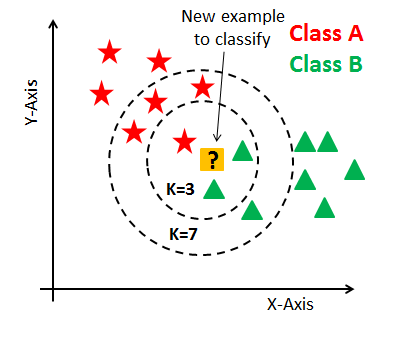
   

## 1. The heart dataset (given) contains 303 patients  heart-disease diagnoses.  

    - age — age in years  
    - sex — (1 = male; 0 = female)  
    - cp — chest pain type  
    - trestbps — resting blood pressure (in mm Hg on admission to the hospital)  
    - chol — serum cholestoral in mg/dl   
    - fbs — (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    - restecg — resting electrocardiographic results
    - thalach — maximum heart rate achieved
    - exang — exercise induced angina (1 = yes; 0 = no)
    - oldpeak — ST depression induced by exercise relative to rest
    - slope — the slope of the peak exercise ST segment
    - ca — number of major vessels (0–3) colored by flourosopy
    - thal — 3 = normal; 6 = fixed defect; 7 = reversable defect
    - target — have disease or not (1=yes, 0=no)








Here are the first 5 patients data:
  

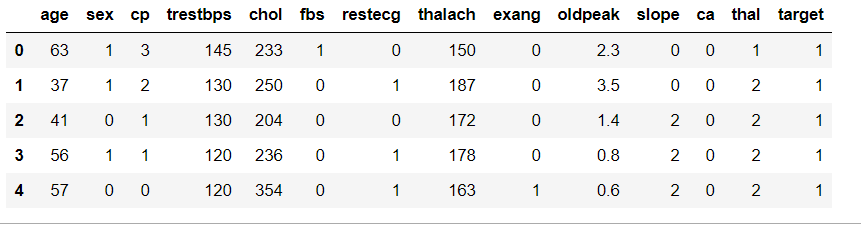

 - Columns 1-13 are some lab results.

 - The last column 'target' shows 1 for 'positive' or 0 for negative 


In [2]:
# library you need:
# !pip install pandas
# !pip install matplotlib
# !pip install -U scikit-learn

In [2]:
# libraries needed
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


# load in the heart disease data into dataframe
df = pd.read_csv("./datasets/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


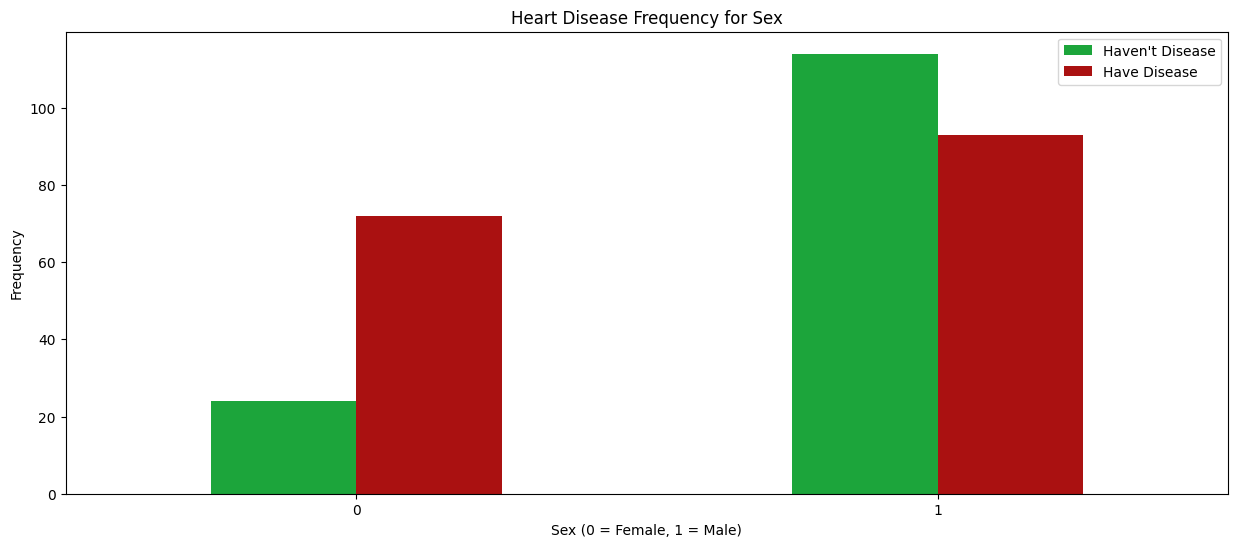

In [4]:
# check the male/female rate

pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

## 2.  K-NN algorithm Implementation

 ---- 

Steps:

 - data in a numpy array 
   
 - ask user to input a patient's id  (int : 0-302),
 
 - write a function to calculate the Euclidean distance (from this patient to all others),
   **See the formula below, target col should be exclusive**
   
 - if k = 10, find top 10 most similar patients based on the shortest distances, and track their diagnoses,
 
 - use majority vote to guess this patient's diagnosis 
 
 - compare with the actual result, if same, no error, otherwise one error.
 
 - lastly, run over all patients and check the overall accuracy 
 
 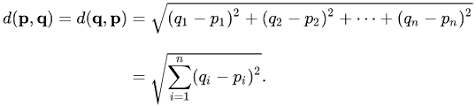
  where n is the number of test parameters.

##   Step 1. For one patient (with given patient ID)

In [5]:
# use numpy array 
# use numpy array 
heart = np.asarray(df)
heart.shape

# Your code start here 

#  distance or similarity (the closer the more similar)
def dist(p, q):
    
        dist =  (sum((p-q)**2))**0.5
        
        # or use the function
        # dist = np.linalg.norm(p-q)
        
        return dist
    
# define a kNN functin, return the majority vote
def kNN(pid, k = 11):

    # (1) use comprehension list to find all distances
    distance  = [ dist(heart[pid][0:-1], heart[i][0:-1]) for i in range(len(heart))]
    distances = np.array(distance)

    # (2) looking for k closest neighbors by similarity with sorted distances first (low to high), return indices
    ind  = np.argsort(distances)                                   #  indices of the sorted array
    short_dis=distances[ind]

    # then track target col: find the k closest patient's diagnoises    
    sum_positive = sum(heart[ind, -1][1:k+1])           # -1 col for the target col # skip the first distance, patient himself
                                                                  
    # (3) majority vote 
    if sum_positive >= k/2:                                                
        predict = 1
    else:
        predict = 0
        
    return predict
    


In [6]:
# (A) for any given patient id as index: x
pid = int( input(" What is the patient's ID: ")  )    

# (B) predition
pred = kNN(pid)
if pred == 1:                                                
    print(" Majority vote from 5 nearest neighbors:  Positive")
else:
    print(" Majority vote from 5 nearest neighbors:  Negative")


# (C) the real diagosis:
actual = heart[pid, -1]
if actual == 1:
    print(" Actually this patient is tested:     Positive.")
else:
    print(" Actually this patient is tested:     Negative.")
  


 What is the patient's ID:  300


 Majority vote from 5 nearest neighbors:  Negative
 Actually this patient is tested:     Negative.


### sample run 1
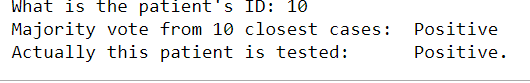

### sample run 2
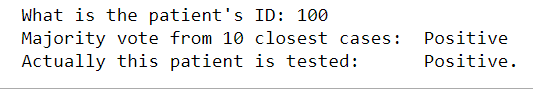

## sample run 3
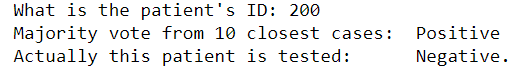

## sample run 4
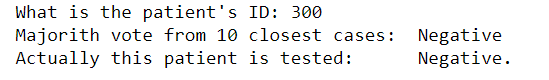

## Step 2.  Overall accuracy
 - apply the k-NN to all patients. Some are correct, some are not. 
 - Find the overall accuracy (%)

In [7]:
# loop over all patients

def accuracy(k_nn):
    total = 0
    
    for pid in range(len(heart)):
        pred = kNN(pid, k=k_nn)
        actual = heart[pid, -1]

        if actual == pred:
            total += 1

    # accuracy
    result = total/len(heart)
    return result 


k_nn = 11
acc = accuracy(k_nn)
print(f'k: {k_nn}   accuracy: {acc}')

k: 11   accuracy: 0.6501650165016502


## Step 3: Find the best k.
    
    For different K, this accuracy might not be the same. Find the best K which corresponds the highest accuracy.


In [ ]:
# loop for different k
acc_knn = []

for i in range(1, 50):
    acc = accuracy(i)
#     print(i, acc)
    acc_knn.append(acc)
    
# Best K is:
best = 1 + np.argmax(acc_knn) # as index itself start 0, we need to add 1 to the argmax
print("Best k:", best, " The max. accuracy", max(acc_knn))

In [ ]:
# plotting (optional for you)
import matplotlib.pyplot as plt
plt.plot(range(1, 50), acc_knn)
plt.xlabel(" k ")
plt.ylabel("accuracy")
plt.title("K-NNs for heart diseases")
plt.show()

In [ ]:
# end

## Can we do better?
https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning#

In [3]:
# data preparing:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# load in the heart disease data into dataframe
df = pd.read_csv("datasets/heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# data preparing:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,False,False,True,False,True,False,False,True,False,False
1,37,1,2,130,250,0,1,187,0,3.5,...,False,True,False,False,False,True,False,True,False,False
2,41,0,1,130,204,0,0,172,0,1.4,...,True,False,False,False,False,True,False,False,False,True
3,56,1,1,120,236,0,1,178,0,0.8,...,True,False,False,False,False,True,False,False,False,True
4,57,0,0,120,354,0,1,163,1,0.6,...,False,False,False,False,False,True,False,False,False,True


In [5]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,False,False,True,False,True,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,0,...,False,True,False,False,False,True,False,True,False,False
2,41,0,130,204,0,0,172,0,1.4,0,...,True,False,False,False,False,True,False,False,False,True
3,56,1,120,236,0,1,178,0,0.8,0,...,True,False,False,False,False,True,False,False,False,True
4,57,0,120,354,0,1,163,1,0.6,0,...,False,False,False,False,False,True,False,False,False,True


In [6]:
# splitting data to X and y
y = df.target.values
x_data = df.drop(['target'], axis = 1)

x_data.min()

age            29
sex             0
trestbps       94
chol          126
fbs             0
restecg         0
thalach        71
exang           0
oldpeak       0.0
ca              0
cp_0        False
cp_1        False
cp_2        False
cp_3        False
thal_0      False
thal_1      False
thal_2      False
thal_3      False
slope_0     False
slope_1     False
slope_2     False
dtype: object

In [7]:
# Normalize:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = min_max_scaler.fit_transform(x_data)

# verify it
# x.max(axis = 0)
# x.min(axis = 1)

In [8]:
# split to training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [9]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test, y_test)*100))

2 NN Score: 77.05%


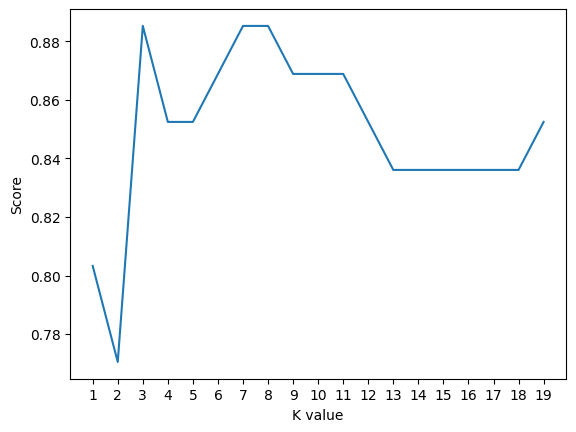

Maximum KNN Score is 88.52%


In [10]:
# try ro find best k value
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

accuracies = {}
acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

# why do we  have different outcomes?
 - Data pre-processing
   such as using dummy, scale....

 - K-NN modeling:
   algorithm, splitting data
    
 - There are more models in sk-learn you can test...

https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning#

In [ ]:
# end